# Visualizing Errors

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

## Basic Errorbars

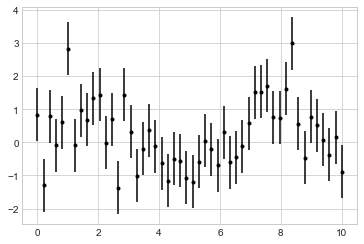

In [2]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

# use of errorbar to diplays error range of each value
plt.errorbar(x, y, yerr=dy, fmt='.k');

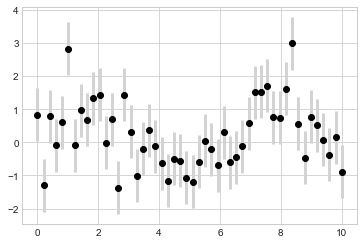

In [3]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0);

## Continuous Errors

In [12]:
from sklearn.gaussian_process import GaussianProcess

# simple Gaussian process regression, using the Scikit-Learn API
# define the model and draw some data
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

# Compute the Gaussian process fit
gp = GaussianProcess(corr='cubic', theta0=1e-2, thetaL=1e-4, thetaU=1E-1,
                     random_start=100)
gp.fit(xdata[:, np.newaxis], ydata)

xfit = np.linspace(0, 10, 1000)
yfit, MSE = gp.predict(xfit[:, np.newaxis], eval_MSE=True)
dyfit = 2 * np.sqrt(MSE)  # 2*sigma ~ 95% confidence region

/home/jbuisine/.pyenv/versions/3.6.5/envs/tensorflow/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GaussianProcess is deprecated; GaussianProcess was deprecated in version 0.18 and will be removed in 0.20. Use the GaussianProcessRegressor instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/jbuisine/.pyenv/versions/3.6.5/envs/tensorflow/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function l1_cross_distances is deprecated; l1_cross_distances was deprecated in version 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/jbuisine/.pyenv/versions/3.6.5/envs/tensorflow/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function constant is deprecated; The function constant of regression_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/home/jbuisine/.pyenv/versions/3.6

/home/jbuisine/.pyenv/versions/3.6.5/envs/tensorflow/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/home/jbuisine/.pyenv/versions/3.6.5/envs/tensorflow/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/home/jbuisine/.pyenv/versions/3.6.5/envs/tensorflow/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/home/jbuisine/.pyenv/versions/3.6.5/envs/tensorflow

/home/jbuisine/.pyenv/versions/3.6.5/envs/tensorflow/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/home/jbuisine/.pyenv/versions/3.6.5/envs/tensorflow/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/home/jbuisine/.pyenv/versions/3.6.5/envs/tensorflow/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/home/jbuisine/.pyenv/versions/3.6.5/envs/tensorflow

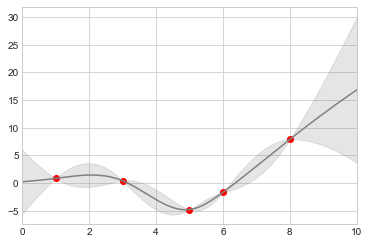

In [11]:
# Visualize the result
plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='gray')

# use for display error in continious
plt.fill_between(xfit, yfit - dyfit, yfit + dyfit,
                 color='gray', alpha=0.2)
plt.xlim(0, 10);